# Identification
Please indicate your name

Student 1: Nguyen Huong Giang LE (DIGIT)

Student 2: Nesrine Naaman (DIGIT)

# Practical work 7: Split and Merge

In this practical work, we implement and test the split and merge algorithm.

In [1]:
### Usefull libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

### Data
img_test = np.full((64,64),150,dtype=np.uint8)
img_test[32:48,16:16+32] = 100
img_test[8:24,40:56] = 50
angio = np.array(Image.open('img/angiogra.png'))
cam = np.array(Image.open('img/cameraman.png'))
muscle = np.array(Image.open('img/muscle.png'))
prisme = np.array(Image.open('img/prisme.png'))
seiche = np.array(Image.open('img/seiche.png'))

### Usefull functions
def neighbors(b,K):
    """ blockStat*list[blockStat]->list[blockStat]
        returns the list of neighbors of b and elements of K 
    """
    def belongsTo(x,y,a):
        """ int*int*BlockStat -> bool 
            Test if pixel (x,y) belongs to block a 
        """
        return x>=a[0] and y>=a[1] and x<a[0]+a[2] and y<a[1]+a[3]
    def areNeighbors(a,b):
        """ BlockStat**2 -> bool
            Test if a and b are neighbors
        """
        if a[2]>b[2] and a[3]>b[3]:
            a,b=b,a
        x,y = a[0]+a[2]//2,a[1]+a[3]//2
        return belongsTo(x+a[2],y,b) or belongsTo(x-a[2],y,b) or belongsTo(x,y+a[3],b) or belongsTo(x,y-a[3],b)
    return [n for n in K if areNeighbors(b,n)]

In [2]:
b = (2, 2, 2, 2)
K = [(0, 2, 2, 2), (4, 2, 2, 2), (2, 4, 2, 2), (6, 6, 2, 2)]
neighbors(b,K)

[(0, 2, 2, 2), (4, 2, 2, 2), (2, 4, 2, 2)]

## Exercise 1

### Question 1
Write the recursive function ``split()`` discussed in tutorial work. 
It takes as input the image, a region, a predicate, and a variable number of arguments. 
The region is a Python formal type ``Block`` defined by:
```python
type Block = tuple[int**4]
```
The function ``split()`` returns a quadtree, a Python formal type, recursivelly defined by:
```python
type QuadTree = list[(QuadTree**4|Block)] 
```

The predicate is a Python function with the following signature:
```python
Array*Block*...->bool
```
It can take a variable number of parameters which correspond to the parameters required by the predicate.

In [3]:
# type Block = tuple[int**4]
# type QuadTree = list[(QuadTree**4|Block)] 
def split(I,reg,pred,*args):
    """ Array*Block*(Array*Block*...->bool)*... -> 4-aire
        Performs a quadtree splitting of image I drived by a predicate
    """
    x,y,n,m = reg

    if predsplit(I,reg, *args) and n >=2 and m >=2:
        n2, m2 = n//2, m//2

        NW = split(I, (x,y,n2,m2),pred,*args)
        NE = split(I, (x+n2,y,n2,m2),pred,*args)
        SW = split(I, (x,y+m2,n2,m2),pred,*args)
        SE = split(I, (x+n2,y+m2,n2,m2),pred,*args)

        return [NW, NE, SW,SE]
    
    return reg

### Question 2
Write the function ```predsplit(I,B,*args)``` with signature:
```python
Array*Block*... -> bool
```
that returns True if the standard deviation of image ``I`` computed in region ``B`` is greater than the first value of argument ``*args`` (it can be accessed simply by ``*args[0]``).

In [4]:
def predsplit(I,reg,*args):
    """ Array*Block*... -> bool
    """ 
    x,y,n,m = reg
    region = I[x:x+n, y:y+m]

    deviation = np.std(region)

    threshold = args[0]
    return deviation > threshold
   

### Question 3
Write the function ``listRegions()`` which applies a depth-first search on the quadtree given as parameter, and returns the list of the leaves of the quadtree. 

Some recalls about lists in Python;
 - Initialization: `L = []` (empty list)
 - Add a element `a` into a list `L`: `L.append(a)`

In [5]:
def listRegions(L):
    """ QuadTree -> list[Block]
    """
    #[[(0, 0, 32, 32)], [[[(32, 0, 8, 8)], [(40, 0, 8, 8)], [(32, 8, 8, 8)], [(40, 8, 8, 8)]], [[(48, 0, 8, 8)], [(56, 0, 8, 8)], [(48, 8, 8, 8)], [(56, 8, 8, 8)]], [[(32, 16, 8, 8)], [(40, 16, 8, 8)], [(32, 24, 8, 8)], [(40, 24, 8, 8)]], [[(48, 16, 8, 8)], [(56, 16, 8, 8)], [(48, 24, 8, 8)], [(56, 24, 8, 8)]]], [[(0, 32, 16, 16)], [(16, 32, 16, 16)], [(0, 48, 16, 16)], [(16, 48, 16, 16)]], [[(32, 32, 16, 16)], [(48, 32, 16, 16)], [(32, 48, 16, 16)], [(48, 48, 16, 16)]]]
    LL = []
    for l in L:
        if type(l) == list:
            sublist = listRegions(l)
            for sub in sublist:
                LL.append(sub)
        else:
            LL.append(l)
    return LL

### Question 4
Test your codes on the synthetic image ``img_test`` seen in tutorial work. Print the value returned by ``split()`` as well as the one returned by ``listRegions()``. 

In [6]:
n,m=img_test.shape
reg = (0,0,n,m)
thres = 2
pred = predsplit(img_test, reg,thres)
l = split(img_test, reg, pred, thres)
print(l)

L = listRegions(l)
print(L)
# Unit test: L is the quadtree produced from img_test
assert len(L) == 25
print("OK")

[(0, 0, 32, 32), [(32, 0, 16, 16), (48, 0, 16, 16), (32, 16, 16, 16), (48, 16, 16, 16)], [[(0, 32, 8, 8), (8, 32, 8, 8), (0, 40, 8, 8), (8, 40, 8, 8)], [(16, 32, 8, 8), (24, 32, 8, 8), (16, 40, 8, 8), (24, 40, 8, 8)], [(0, 48, 8, 8), (8, 48, 8, 8), (0, 56, 8, 8), (8, 56, 8, 8)], [(16, 48, 8, 8), (24, 48, 8, 8), (16, 56, 8, 8), (24, 56, 8, 8)]], [(32, 32, 16, 16), (48, 32, 16, 16), (32, 48, 16, 16), (48, 48, 16, 16)]]
[(0, 0, 32, 32), (32, 0, 16, 16), (48, 0, 16, 16), (32, 16, 16, 16), (48, 16, 16, 16), (0, 32, 8, 8), (8, 32, 8, 8), (0, 40, 8, 8), (8, 40, 8, 8), (16, 32, 8, 8), (24, 32, 8, 8), (16, 40, 8, 8), (24, 40, 8, 8), (0, 48, 8, 8), (8, 48, 8, 8), (0, 56, 8, 8), (8, 56, 8, 8), (16, 48, 8, 8), (24, 48, 8, 8), (16, 56, 8, 8), (24, 56, 8, 8), (32, 32, 16, 16), (48, 32, 16, 16), (32, 48, 16, 16), (48, 48, 16, 16)]
OK


### Question 5
Write the function ```drawRegions(L,I)``` which takes as arguments a list of regions, an image, and returns an image  where the boundaries of each region have been traced with red color. Indication: the returned image is a hypermatrix of dimension 3, the third dimension is of size 3 and encodes the red, green and blue components of a RGB colorspace. Test the function on the previous example.

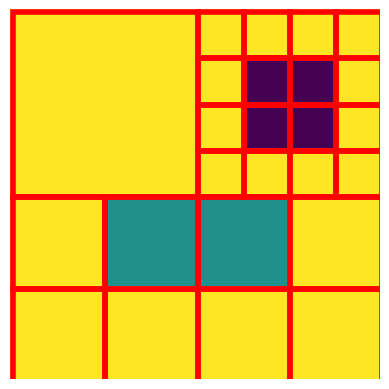

In [7]:
import matplotlib.patches as patches
def drawRegions(LL,I, lineweight, title):
    """ list[Block]*Array -> Array
        parcours de la liste dessin des régions 
    """
    fig, ax = plt.subplots()
    ax.imshow(I)
    #[(x1,y1,n1,m1),(x2,y2,n1,m1)]
    # [x:x+w,y:y+h] draw edge with red corlor in this position
    for l in LL:
        x,y,n,m = l
        border = patches.Rectangle(
            (y, x), 
            m,   # Width of the border
            n,  # Height of the border
            linewidth=lineweight,  # Border thickness
            edgecolor='red',
            facecolor='none'  # No fill inside the border
        )
        ax.add_patch(border)
    # boundaries of each region traced with red color
    ax.axis("off")
    if title:
        plt.title(title)
    plt.show()

drawRegions(L,img_test, 4, title=None)

### Question 6
Add a Gaussian noise with standard deviation 5 to the image ``img_test``. 
Apply the quadtree splitting on the noisy image by adjusting the threshold to obtain the same result as in the previous question. 
Which threshold value should be chosen? Does this make sense to you?

Hint: use the Numpy function ``random.randn()`` which generates random values according to a normal distribution (Gaussian distribution of null mean and variance 1). To obtain realizations of a Gaussian distribution of standard deviation $\sigma$, it is sufficient to multiply by $\sigma$ the realizations of a normal distribution. 

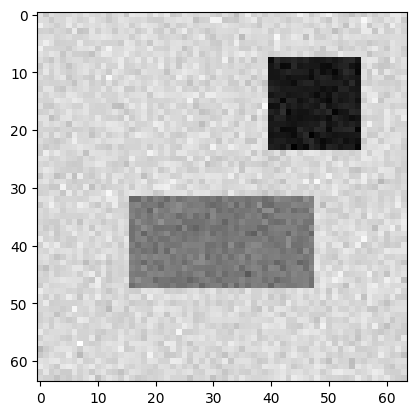

In [8]:
from numpy import random

n,m = img_test.shape
mean = 0 
stddev = 5
noise = stddev * np.random.randn(n,m)

noisy_img = img_test + noise

noisy_img = np.clip(noisy_img, 0 ,255)
noisy_img = noisy_img.astype(np.uint8)

plt.imshow(noisy_img)
plt.gray()
plt.show()


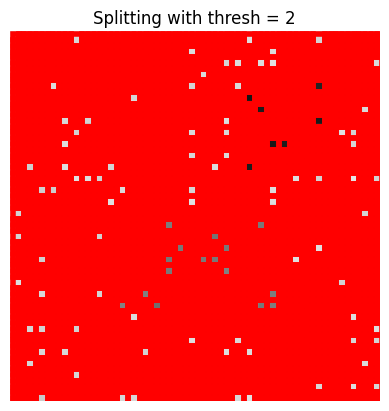

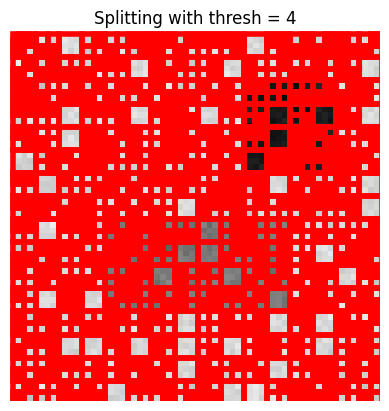

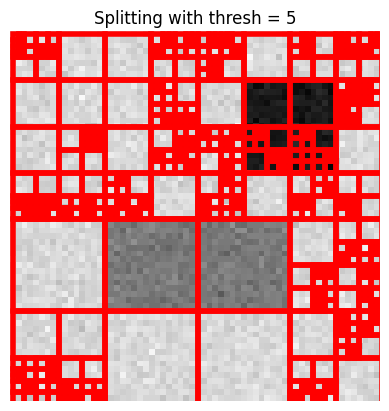

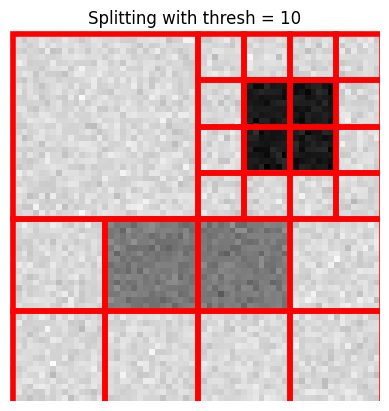

In [9]:

reg = (0,0,n,m)
thres = 2
pred = predsplit(noisy_img, reg, thres)
l = split(noisy_img, reg, pred, thres)

L = listRegions(l)
drawRegions(L,noisy_img,4, title="Splitting with thresh = 2")

reg = (0,0,n,m)
thres = 4
pred = predsplit(noisy_img, reg, thres)
l = split(noisy_img, reg, pred, thres)

L = listRegions(l)
drawRegions(L,noisy_img,4, title="Splitting with thresh = 4")

reg = (0,0,n,m)
thres = 5
pred = predsplit(noisy_img, reg, thres)
l = split(noisy_img, reg, pred, thres)

L = listRegions(l)
drawRegions(L,noisy_img,4, title="Splitting with thresh = 5")

reg = (0,0,n,m)
thres = 10
pred = predsplit(noisy_img, reg, thres)
l = split(noisy_img, reg, pred, thres)

L = listRegions(l)
drawRegions(L,noisy_img,4, title="Splitting with thresh = 10")



For different values of thresholds, we noticed that the one that gave the best segmentation was around 10. This makes sense because for a small threshold, the standard deviation of a region would more likely be larger than the threshold because of the introduced noise and we will have a lot of segmentation , just like we see in the first 3 illustrations. the threshold should depend on the standard deviation that we would want a homogeneous region to have. usually it could even be set to less than 10 in a very homogeneous region, but here, it was set to 10 because of the noise introduced in the image.

## Exercise 2

Experiment the split algorithm on the 4 natural images provided. For each image try to find the threshold that seems to you visually the best. Display the number of regions obtained after splitting.

For splitting of the 5 images we have, we chose threshold= 0.4 * the standard deviation of the entire image. We noticed that visually this value gave the best segmentation results. 

After splitting, we obtained 4678 regions


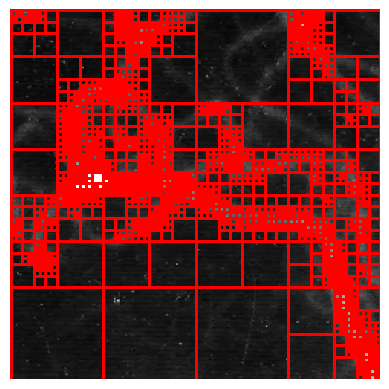

After splitting, we obtained 5071 regions


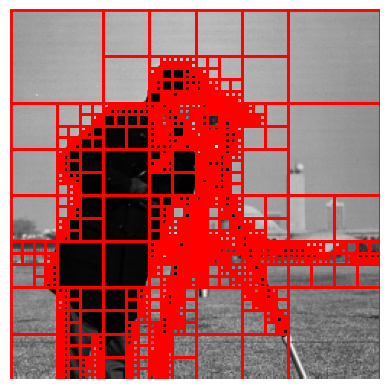

After splitting, we obtained 6175 regions


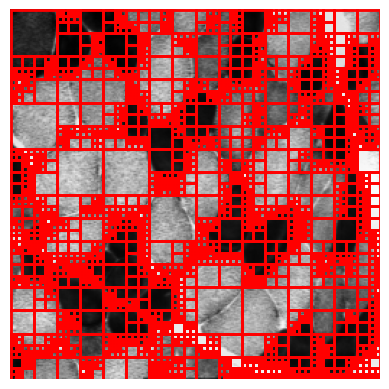

After splitting, we obtained 13162 regions


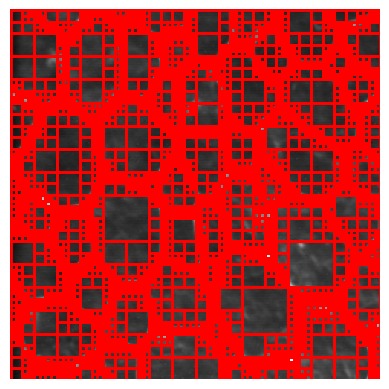

After splitting, we obtained 9526 regions


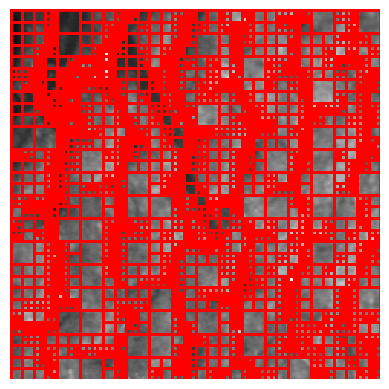

In [11]:
list_image = [angio,cam,muscle,prisme,seiche]
img = list_image[0]
for img in list_image:
    n,m = img.shape
    reg = (0,0,n,m)
    thres = 0.4 * np.std(img)
    pred = predsplit(img, reg, thres)
    l = split(img, reg, pred, thres)

    L = listRegions(l)
    print("After splitting, we obtained", len(L), "regions")
    drawRegions(L,img,2, title=None)

## Exercise 3
### Question 1
Modify the function ``listRegions(L)`` to make it a function ``listRegionsStat(L,I)`` which computes the list of leaves of the quadtree ``L``. Each element of this list will be enriched with three scalar values: the first being the size, the second the mean and the third the variance of pixel values of the block in the image ``I``. This function then returns a list whose elements have the following formal type:
```python
type BlockStat = tuple[int**4,int,float**2]
```

The first four values are those of the ``Block`` type, the fifth is the size of the block (in number of pixels) and the last two values are the mean and variance calculated over the region.

In [12]:
# type BlockStat = tuple[int**4,int,float**2]

def listRegionsStat(L,I):
    """ QuadTree*Array -> list[BlockStat] """
    new_list = []
    new_leaf = ()
    listreg = listRegions(L)
    for leaf in listreg:
        x,y,n,m = leaf
        size = n*m
        mean = (np.mean(I[x:x+n,y:y+m]))
        var = (np.std(I[x:x+n,y:y+m]) ** 2)
        new_leaf=(x,y,n,m,size,mean,var)
        new_list.append(new_leaf)
    return new_list


### Question 2
In the remainder, the formal type is considered:
```python
type Region = list[BlocStats]
```
A region, as seen during the tutorial work, is therefore a list of blocks. Write the predicate ``predmerge(b,R,*args)`` as seen in tutorial work. This function returns ``True`` if the ``b`` block should merge into the ``R`` region. If a merge happens, then the first item of ``R`` will have its statistics updated to describe the statistics of the region ``R`` merged with `b`.

In [13]:
def predmerge(b,R,*args):
    """ BlocsStat*Region*... -> bool 
        If merge, R[0] is modified
    """
    # print("std bm: ", b[6])
    # print("std R[0]: ", R[0][6])
    distance = np.abs(b[5] - R[0][5])
    # print("d=",distance)
    thres = args[0]
    return distance < thres

### Question 3
Using `predmerge()` and `neighbors()` functions, given at the beginning of the notebook, write the function ``merge()`` discussed in tutorial work (exercise 7.6).

Recalls on Python lists:
- Remove an element `a` from a list `L`: `L.remove(a)`
- Test if `a` belongs to a list `L`: `a in L` 
- Iterate the elements of a list `L`: `for a in L:`
- Access to an element of a list: as with numpy arrays

In [14]:
def merge(S,I,*args):
    """ QuadTree*Array*(BlockStat*Region*...->bool) -> list[Region]
        Merge the leaves of S in a list of regions
    """
    K = listRegionsStat(S,I)
    # print("K=",K)
    L=[]
    while K:
        b = K.pop(0)
        # print("b=",b)
        R = [b]
        N = neighbors(b,K)
        # print("N=",N)
        while N:
            bm = N.pop(0)
            if predmerge(bm,R,*args) == True:
                r = list(R[0])
                r[5] = (r[5]+bm[5])//2
                
                R[0] = tuple(r)
                K.remove(bm)
                R.append(bm)
                # print("R =", R)
                # update statistic of R
                neighbor = neighbors(bm,K)
                for n in neighbor:
                    if n not in N:
                        N.append(n)
        L.append(R)
    return L

### Question 4
Test the previous functions using the synthetic image `img_test`. In particular, check that merge() returns a list of 3 elements (i.e. 3 regions).

In [15]:
n,m=img_test.shape
reg = (0,0,n,m)
thres = 0.5
pred = predsplit(img_test, reg,thres)
S = split(img_test, reg, pred, thres)
# K = listRegionsStat(S,img_test)
# print(K)
M = merge(S,img_test,thres)
print(len(M))
# Unit test: M is the list of merged blocs returned by merge()
assert len(M) == 3
print("OK")

3
OK


### Question 5
Write a function ``regions(LR,shape)`` that takes as arguments a list of regions (such as returned by the function ``merge()``) and an image size, and returns an image of the regions. Each region will be colored with the gray level corresponding to the average of the region. You also can assign random colors to each region to clearly distinguish adjacent regions. The ``shape`` parameter gives the size of the image to be reconstructed. 

Test the function on the previous example.

In [16]:
def regions(LR,shape):
    """ list[Region]*tuple[int,int] -> Array """
    #shape = (n,m)
    I = np.zeros(shape)
    for R in LR:
        average_color = R[0][5]
        for leaf in R:
            x,y,n,m,_,_,_ = leaf
            I[x:x+n,y:y+m] = average_color
    return I


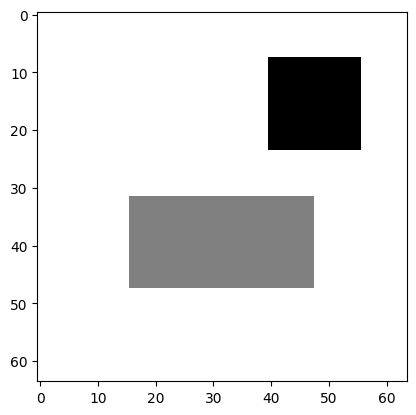

In [17]:
n,m = img_test.shape
img_reconst = regions(M,(n,m))
plt.imshow(img_reconst)
plt.show()

## Exercise 4: experiments
### Question 1
Test the function ``merge()`` on the images ``angio``, ``cam``, ``muscle``, ``prisme`` and ``seiche``. Try to produce the best segmentations.

In [18]:
def split_and_merge(I,thres_split, thres_merge):
    n,m = I.shape
    reg = (0,0,n,m)
    pred = predsplit(I, reg,thres_split)
    S = split(I, reg, pred, thres_split)
    
    M = merge(S,I,thres_merge)
    img_reconst = regions(M,(n,m))
    plt.imshow(img_reconst)
    plt.axis("off")
    plt.show()

For the thresholds, we saw it best to have 0.4 * the standard deviation of the image as threshold of the splitting and 0.4 for the threshold of the merging 

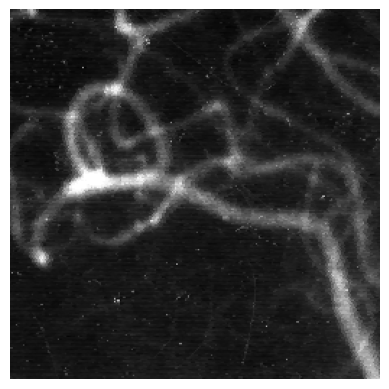

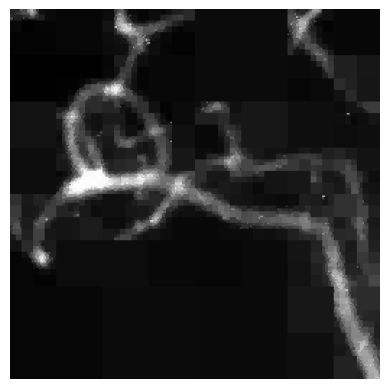

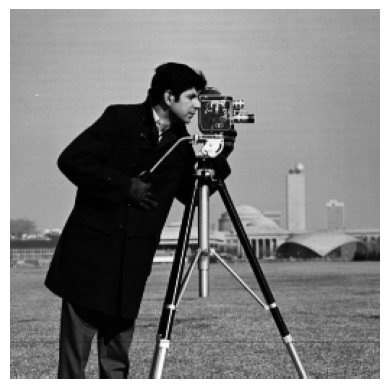

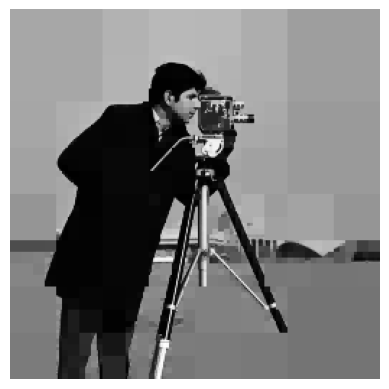

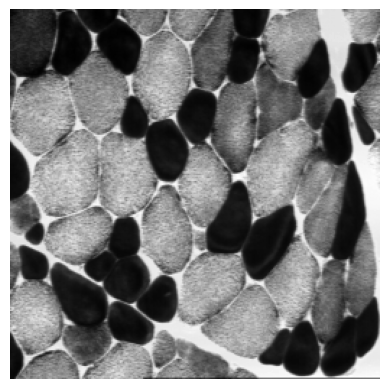

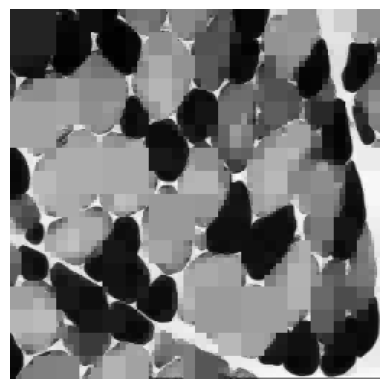

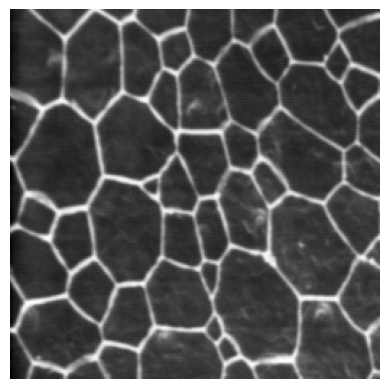

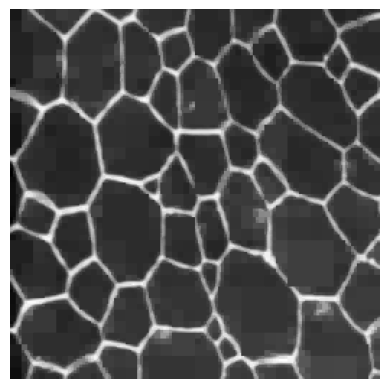

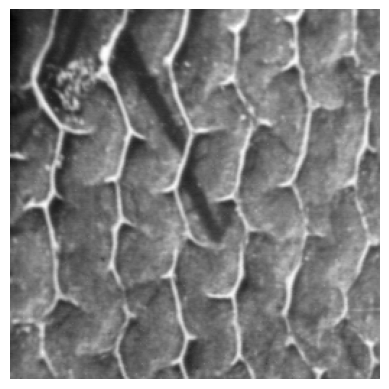

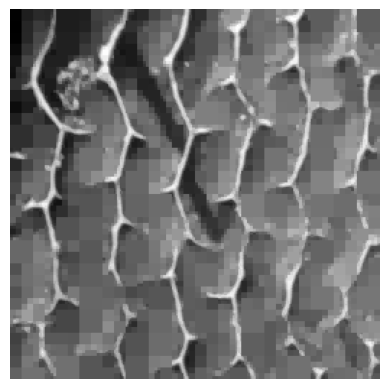

In [19]:
for img in list_image:
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    thres_split = 0.4* np.std(img)
    thres_merge=0.4
    split_and_merge(img,thres_split,thres_merge)

### Question 2
The result of the merge algorithm highly depends on how you visit the regions. One can then sort the leaves of the quadtree, for example, from the smallest to the largest blocks, or the opposite (use the Python function ``sorted()``). 
The same question arises when calculating the set of neighbors of the merged region. Should they be sorted? If yes, according to which criteria? their size? their proximity? 
Obviously there is no universal answer but it should be adapted to each type of problem. 
Do some tests to see the influence of these sortings on the result of the merger.

For this question, we modified the merge function to include some sorting techniques. First, the function sorts the leaves we have in the quadtree (The homogeneous regions obtained after the split) based on their size in an increasing order.
Second, we included another parameter that can be set to: <br>
- "mean": sorts additionally the neighbors of a region in an increasing order of their mean
- "size": sorts additionally the neighbors of a region in an increasing order of their size
- "var": sorts additionally the neighbors of a region in an increasing order of their variance

We displayed the result of the original merge of each of the 5 images that we had and the result of the merge upon sorting the regions only, then upon sorting the regions and the neighbors based on their mean, size, or variance.

The results showed a very small difference between the original merging and the merging upon sorting. This can be seen by displaying the number of regions of each merging. Before and after any sorting methods that we employed, the number of regions were differing by maximum of 4 regions. 

The difference also was not the same between images and was not the same across sorting techniques. 
As examples:
- for angio image, sorting the homogeneous regions by size and their neighbors by the mean gave the biggest difference between the number of regions with the original merging. (difference of 3 regions)
- for cam image, sorting the homogeneous regions by size and their neighbors by the mean gave the smallest difference between the number of regions with the original merging. (difference of 1 region) while the difference was 2 regions when using the rest of the sorting criteria. <br>

As a result, we can conclude that, regardless of the sorting, a difference was always indeed observed so the order of the neighbors processed when merging definitely affects the merging process. However, the results are not consistent across pictures and so it all depends on the context and the specific image we are processing.  

In [20]:
# L: x,y,n,m, size, mean, std
# L.sorted(L[4])

def merge_sort_all(S,I,*args):
    """ QuadTree*Array*(BlockStat*Region*...->bool) -> list[Region]
        Merge the leaves of S in a list of regions
    """
    K = listRegionsStat(S,I)
    K_sort = sorted(K, key=lambda tup: tup[4])
    # print("K=",K)
    L=[]
    while K_sort:
        b = K_sort.pop(0)
        # print("b=",b)
        R = [b]
        N = neighbors(b,K_sort)
        if (args[1] == "mean"):
            N_sort = sorted(N, key=lambda tup: tup[5])
        elif (args[1] == "size"):
            N_sort = sorted(N, key=lambda tup: tup[4])
        elif (args[1]=="var"):
            N_sort = sorted(N, key=lambda tup: tup[6])
        elif (args[1] == "none"):
            N_sort = N.copy()
        # print("N=",N)
        while N_sort:
            bm = N_sort.pop(0)
            if predmerge(bm,R,*args) == True:
                r = list(R[0])
                r[5] = (r[5]+bm[5])//2
                
                R[0] = tuple(r)
                K_sort.remove(bm)
                R.append(bm)
                # print("R =", R)
                # update statistic of R
                neighbor = neighbors(bm,K_sort)
                #sorting neighbor as well before appending it:
                if (args[1] == "mean"):
                    neighbor=sorted(neighbor, key=lambda tup: tup[5])
                elif (args[1] == "size"):
                    neighbor=sorted(neighbor, key=lambda tup: tup[4])
                elif (args[1]=="var"):
                    neighbor=sorted(neighbor, key=lambda tup: tup[6])
                for n in neighbor:
                    if n not in N_sort:
                        N_sort.append(n)
        L.append(R)
    return L

def compare_merge(I,thres_split, thres_merge, criteria):
    n,m = I.shape
    reg = (0,0,n,m)
    pred = predsplit(I, reg,thres_split)
    S = split(I, reg, pred, thres_split)
    
    M1 = merge(S,I,thres_merge)
    print(len(M1))
    M2 = merge_sort_all(S,I,thres_merge, criteria)
    print(len(M2))

    img_reconst1 = regions(M1,(n,m))
    plt.imshow(img_reconst1)
    plt.axis("off")
    plt.show()
    
    img_reconst2 = regions(M2,(n,m))
    plt.imshow(img_reconst2)
    plt.axis("off")
    plt.show()

4277
4279


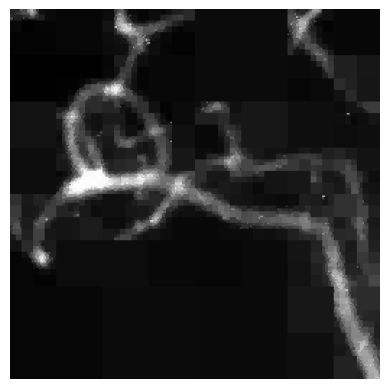

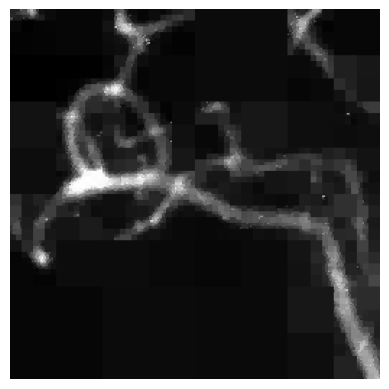

4697
4695


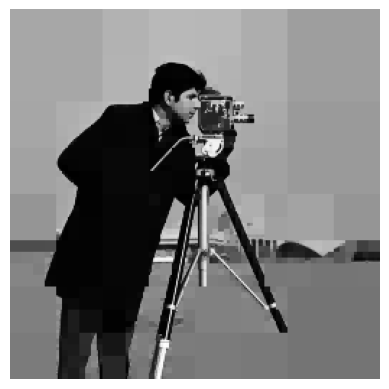

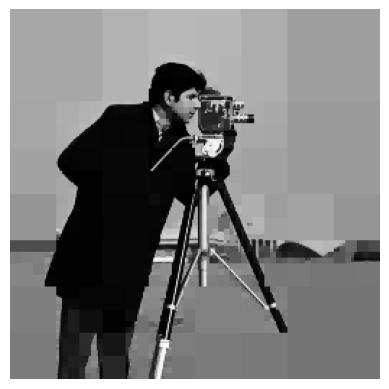

5837
5834


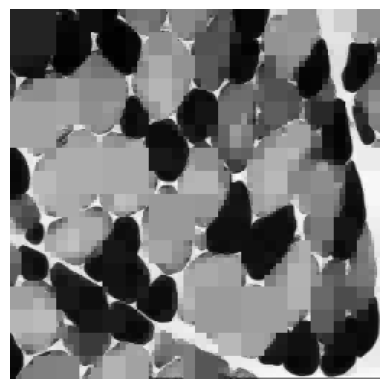

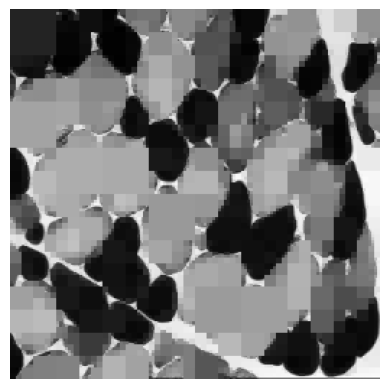

12516
12519


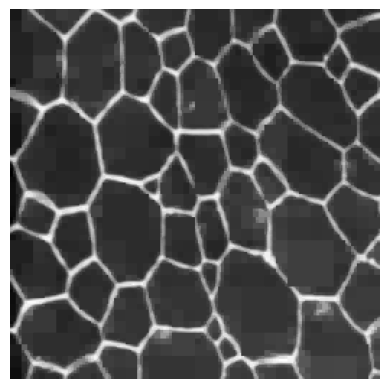

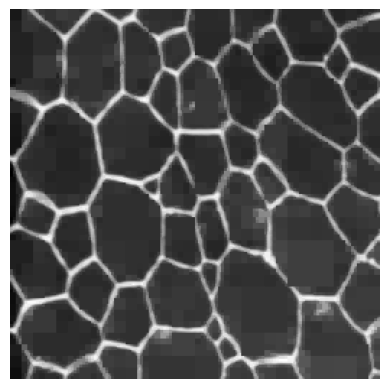

9000
8999


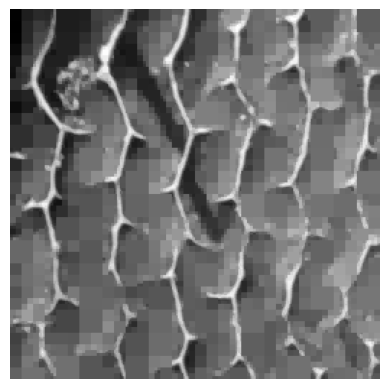

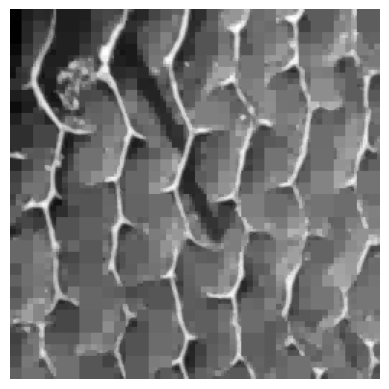

In [21]:
for img in list_image:
    thres_split= 0.4*np.std(img)
    thres_merge=0.4
    compare_merge(img,thres_split,thres_merge,"none")

4277
4279


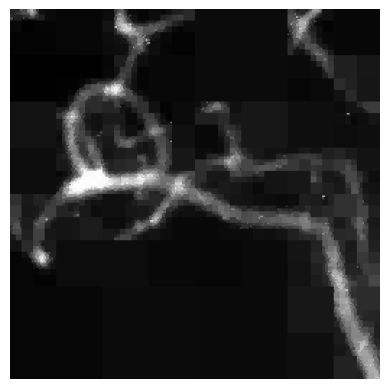

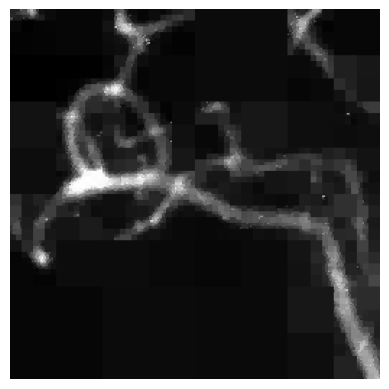

4697
4695


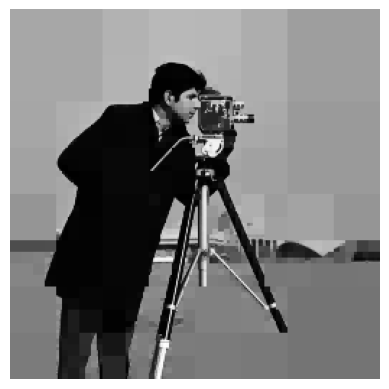

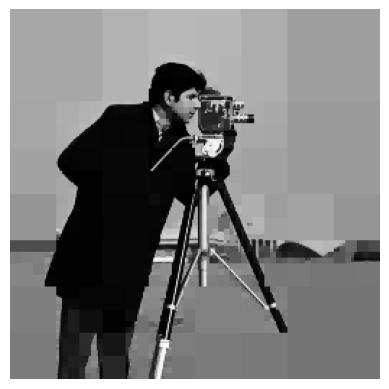

5837
5834


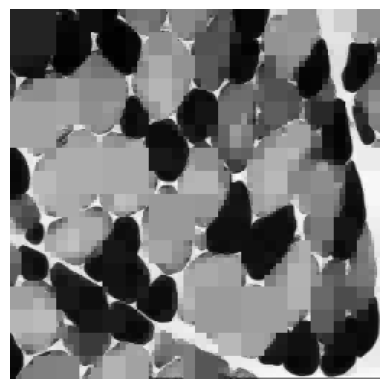

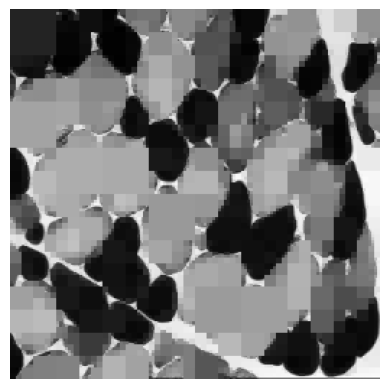

12516
12519


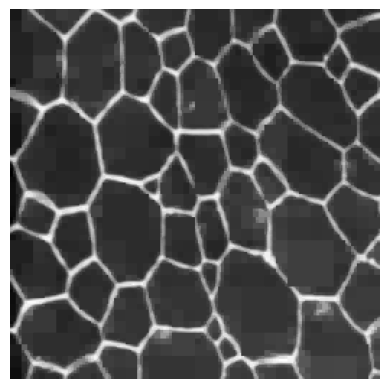

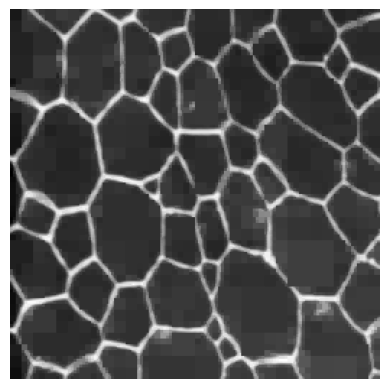

9000
8999


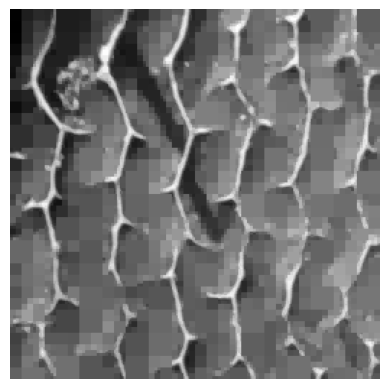

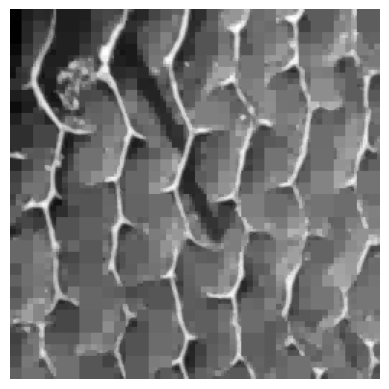

In [22]:
for img in list_image:
    thres_split= 0.4*np.std(img)
    thres_merge=0.4
    compare_merge(img,thres_split,thres_merge,"size")

4277
4280


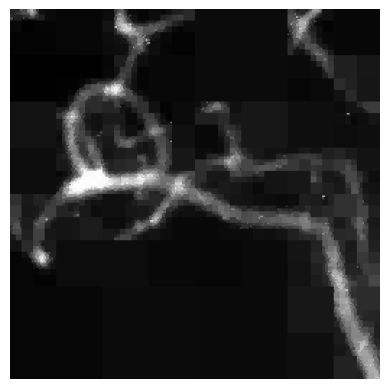

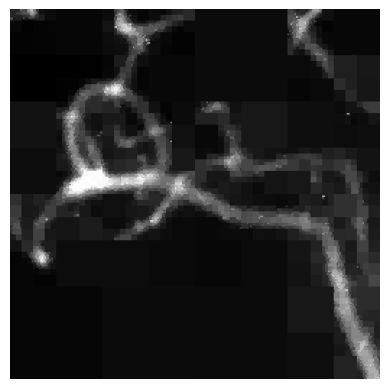

4697
4700


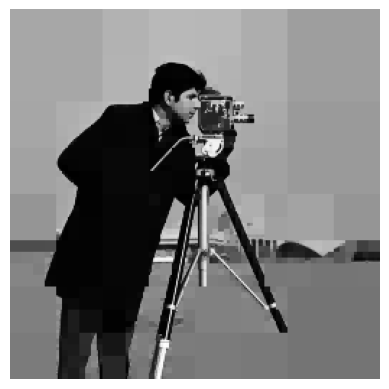

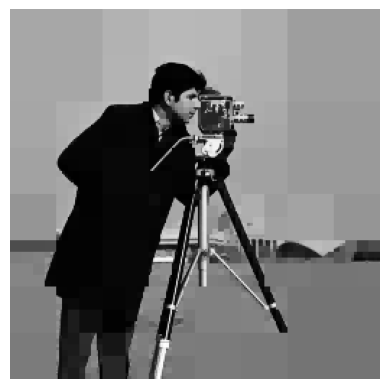

5837
5836


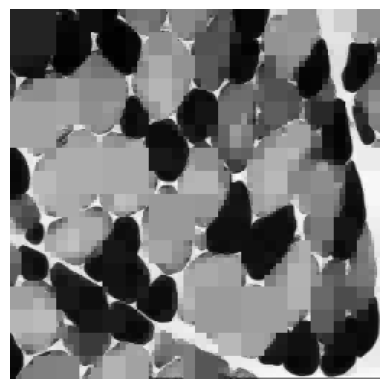

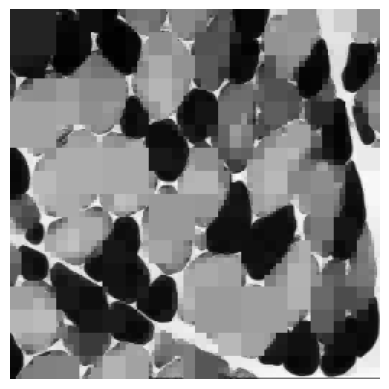

12516
12531


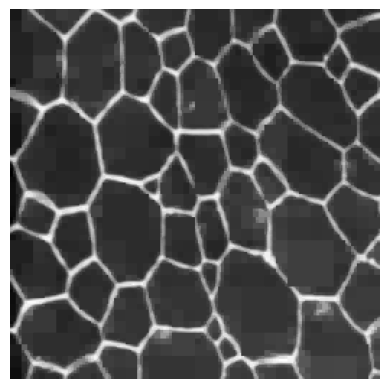

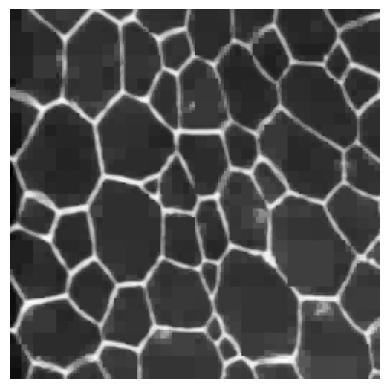

9000
9005


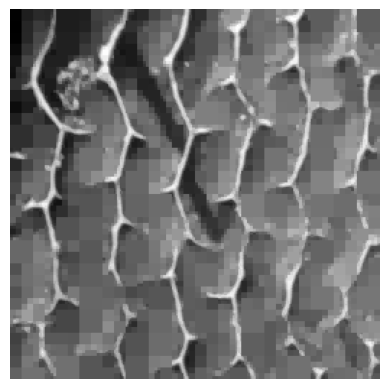

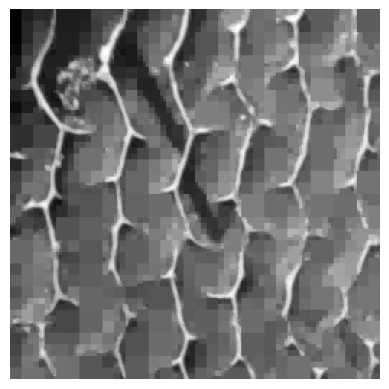

In [23]:
for img in list_image:
    thres_split= 0.4*np.std(img)
    thres_merge=0.4
    compare_merge(img,thres_split,thres_merge,"mean")

4277
4279


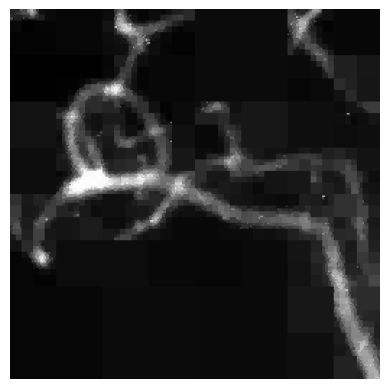

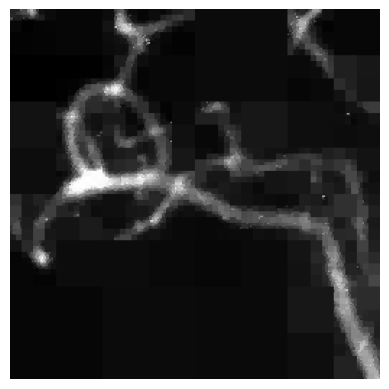

4697
4695


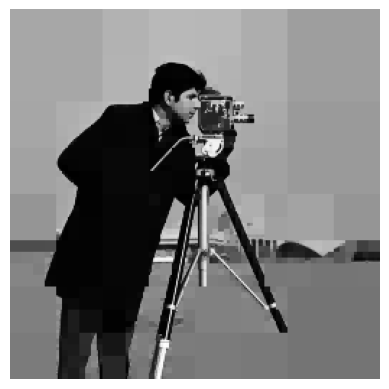

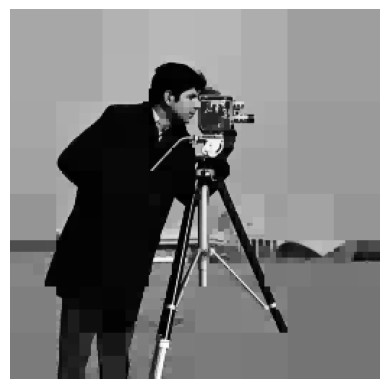

5837
5833


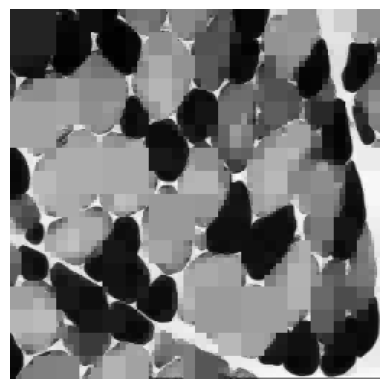

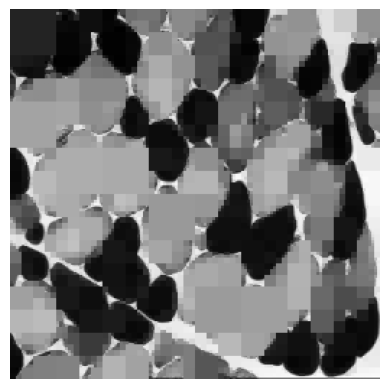

12516
12520


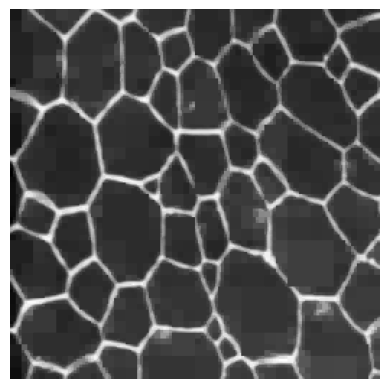

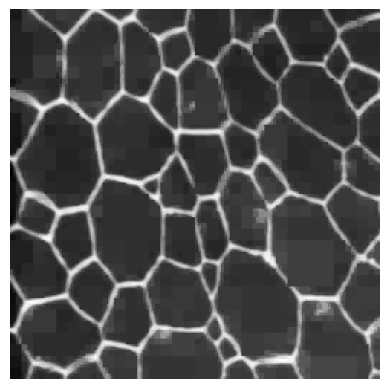

9000
8998


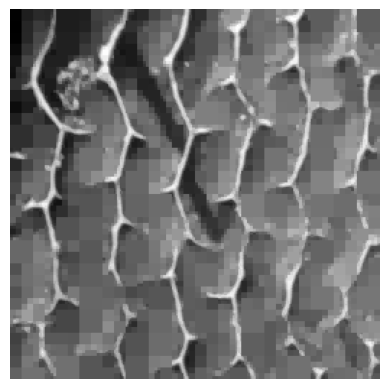

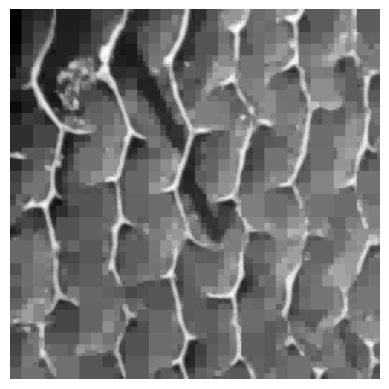

In [24]:
for img in list_image:
    thres_split= 0.4*np.std(img)
    thres_merge=0.4
    compare_merge(img,thres_split,thres_merge,"var")

### Question 3
Imagine and experiment alternative predicates for both the split and the merge steps. It is possible to use edges-based predicates, and also to combine with variance-based predicates.


For the first experiment: predicates for the split step
we provide which predicate we want to use for the split in the args: option "edge" for an edge-based predicate, "var" for a variance-based predicate, and "both" for predicate combining both the edges and the variance.

* Edge-based predicate: we detect edges in each region, calculate the mean edges, if the mean is greater than a threshold value, we split the region, otherwise we dont split
* Variance-based predicate: we calculate the variance in each region, if it is greater than a threshold, we split the region, otherwise we dont split
* Edge-based predicate combined with Variance-based predicate: we only split if both conditions are true: mean of edges in a region is greater than a threshold AND the variance of the region is greater than a threshold

In [25]:
# edge-based predicates combine variance-based
from scipy.signal import convolve2d

def SobelDetector(I, s):
    """ Array*double -> Array """
    Sx=[[1,0,-1], [2,0,-2], [1,0,-1]]
    Sy=[[1,2,1],[0,0,0],[-1,-2,-1]]
    Ix=convolve2d(I, Sx, mode="same")
    Iy=convolve2d(I, Sy, mode="same")
    G_or=np.int64(np.sqrt(Ix**2 + Iy**2))
    G = G_or.copy()
    for i in range(G.shape[0]):
        for j in range(G.shape[1]):
            if (G[i][j]>=s):
                G[i][j]=1
            else:
                G[i][j]=0
    return G

def predsplit_edge(I,reg, *args):
    x,y,n,m = reg
    region = I[x:x+n, y:y+m]
    thres = args[0]**2

    edge = SobelDetector(region,200)
    mean_edge = np.mean(edge)
    # print(region_edge)
    thres = args[0]
    return mean_edge > thres

def predsplit_var(I, reg, *args):
    x,y,n,m = reg
    region = I[x:x+n, y:y+m]
    thres = args[0]**2
    variance = np.std(region)**2
    return variance > thres

def predsplit_combined(I,reg,*args):
    return predsplit_edge(I,reg,args[0]) and predsplit_var(I,reg,args[1])

In [26]:
def split2(I,reg,pred,*args):
    """ Array*Block*(Array*Block*...->bool)*... -> 4-aire
        Performs a quadtree splitting of image I drived by a predicate
    """
    x,y,n,m = reg
    criteria = args[0]
    if criteria == "edge":
        pred2 = predsplit_edge(I, reg, args[1])
    elif criteria == "var":
        pred2 = predsplit_var(I, reg, args[1])
    elif criteria == "both":
        pred2 = predsplit_combined(I,reg, args[1], args[2])

    if pred2 and n >=2 and m >=2:
        n2, m2 = n//2, m//2

        NW = split2(I, (x,y,n2,m2),pred,*args)
        NE = split2(I, (x+n2,y,n2,m2),pred,*args)
        SW = split2(I, (x,y+m2,n2,m2),pred,*args)
        SE = split2(I, (x+n2,y+m2,n2,m2),pred,*args)

        return [NW, NE, SW,SE]
    
    return reg

The number of regions after splitting: 52468


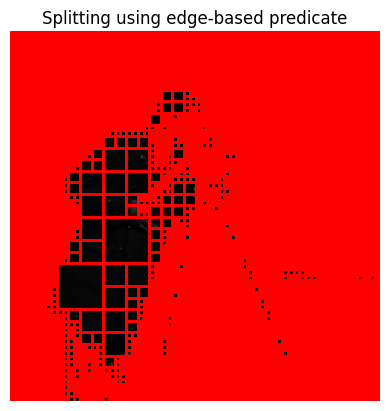

The number of regions after splitting: 5071


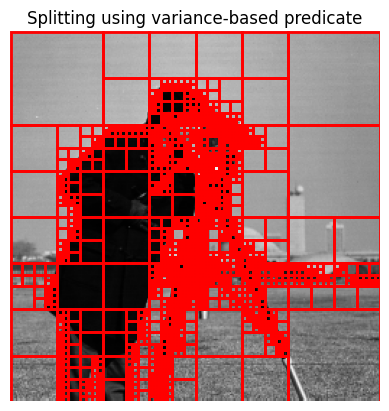

The number of regions after splitting: 5047


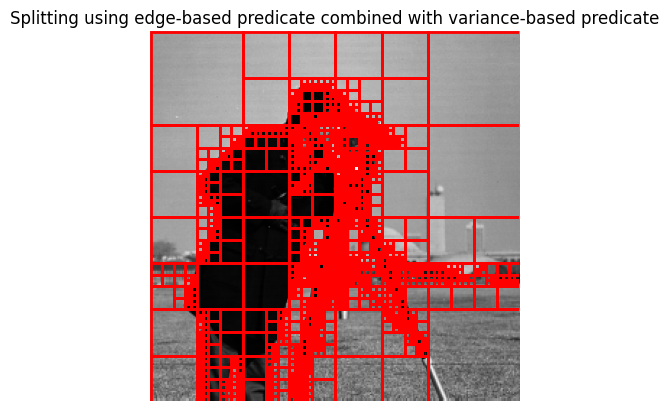

In [27]:
I = cam
n,m = I.shape
reg = (0,0,n,m)

thres_split_edge = 0.005

pred = predsplit_edge(I, reg, thres_split_edge)
S = split2(I, reg, pred, "edge" , thres_split_edge)
L = listRegions(S)
print("The number of regions after splitting:", len(L) )
drawRegions(L,I,2, title="Splitting using edge-based predicate")

thres_split_var = 0.4 * np.std(I)

pred = predsplit_var(I, reg,thres_split_var)
S = split2(I, reg, pred, "var" , thres_split_var)
L = listRegions(S)
print("The number of regions after splitting:", len(L) )
drawRegions(L,I,2, title="Splitting using variance-based predicate")

pred = predsplit_combined(I, reg,thres_split_edge, thres_split_var)
S = split2(I, reg, pred, "both" , thres_split_edge, thres_split_var)
L = listRegions(S)
print("The number of regions after splitting:", len(L) )
drawRegions(L,I,2, title="Splitting using edge-based predicate combined with variance-based predicate")

The number of regions after splitting:  9328


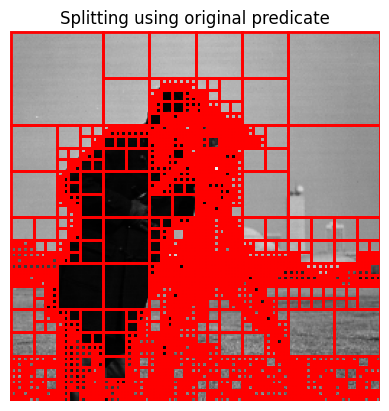

In [28]:
n,m = I.shape
reg = (0,0,n,m)
thres_split = 15
pred = predsplit(I, reg,thres_split)
S = split(I, reg, pred, thres_split)
L = listRegions(S)
print("The number of regions after splitting: ", len(L))

drawRegions(L,I,2, title="Splitting using original predicate")

We noticed that the edge-based predicate alone will result in a lot of splits since we are splitting whenever there's a lot of edges in a regions. When we use the edge-based predicate alongside the variance-based predicate, we add more constraint on splitting (if the variance in a region is greater than the threshold, we have to additionally check if the number of edges in that region is greater than a threshold). This explains why we got less regions in the combined method.

For the second experiment: predicates for the merge step
Similarly, we provided option "edge" for an edge-based predicate, "var" for a variance-based predicate, and "both" for predicate combining both the edges and the variance.

* Edge-based predicate: we get the edges of every block in a region R, and calculate the mean edges in that region. we calculate the mean edges of the neighbor b that we might merge to R and the mean edges of the new region R' if we merged R with b. if the new mean edges of R' is very different than the mean edges of R, we do not merge.
* Variance-based predicate: we calculate the difference between variances of the region and the neighbor, if it's less than a threshold we merge.
* Edge-based predicate combined with Variance-based predicate: we only merge if both conditions are true.

In [29]:
def predmerge_edge(b,I, R,*args):
    """ BlocsStat*Region*... -> bool 
        If merge, R[0] is modified
    # """
    thres = args[0]
    
    edges = []
    for bn in R:
        G = SobelDetector(I[bn[0]:bn[0]+bn[2], bn[1]:bn[1]+bn[3]],200)
        edges.append(G)
    mean_edge = np.mean([np.mean(edge) for edge in edges])
    
    Gb = SobelDetector(I[b[0]:b[0]+b[2], b[1]:b[1]+b[3]],200)
    mean_edge_R_b = np.mean(mean_edge + np.mean(Gb))
    distance = abs(mean_edge - mean_edge_R_b)
    return distance < thres

    
def predmerge_var(b,R,*args):
    """ BlocsStat*Region*... -> bool 
        If merge, R[0] is modified
    """
    distance = np.abs(b[6] - R[0][6])
    thres = args[0]
    return distance < thres

def predmerge_combined(b,I,R,*args):
    return predmerge_edge(b,I,R,args[0]) and predmerge_var(b,R,args[1])

In [30]:
def merge2(S,I,*args): # args[0]: predicates criteria
    """ QuadTree*Array*(BlockStat*Region*...->bool) -> list[Region]
        Merge the leaves of S in a list of regions
    """
    K = listRegionsStat(S,I)
    L=[]
    pred_crit = args[0]
    while K:
        b = K.pop(0)
        R = [b]
        N = neighbors(b,K)
        while N:
            bm = N.pop(0)
            if pred_crit == "edge":
                pred = predmerge_edge(bm,I, R,args[1])
            elif pred_crit == "var":
                pred = predmerge_var(bm,R, args[1])
            elif pred_crit == "both":
                pred = predmerge_combined(bm,I,R,args[1],args[2])
            if pred == True:
                r = list(R[0])
                r[5] = (r[5]+bm[5])//2
                
                R[0] = tuple(r)
                K.remove(bm)
                R.append(bm)
                # print("R =", R)
                # update statistic of R
                neighbor = neighbors(bm,K)
                for n in neighbor:
                    if n not in N:
                        N.append(n)
        L.append(R)
    return L

In [31]:
def split_and_merge(I,thres_split,criteria,*args):
    n,m = I.shape
    reg = (0,0,n,m)
    pred = predsplit(I, reg,thres_split)
    S = split(I, reg, pred, thres_split)
    
    M = merge2(S,I,criteria ,*args)
    print(len(M))
    img_reconst = regions(M,(n,m))
    plt.imshow(img_reconst)
    plt.axis("off")
    plt.show()

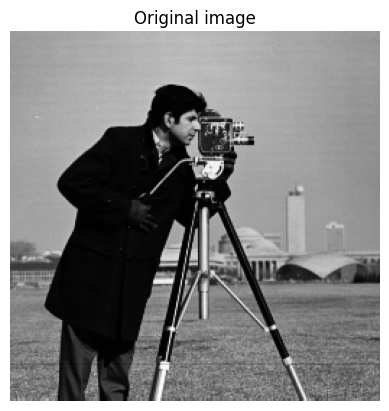

886


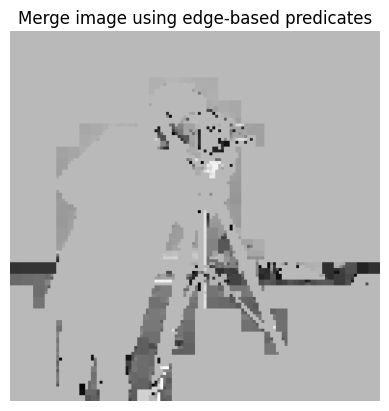

1617


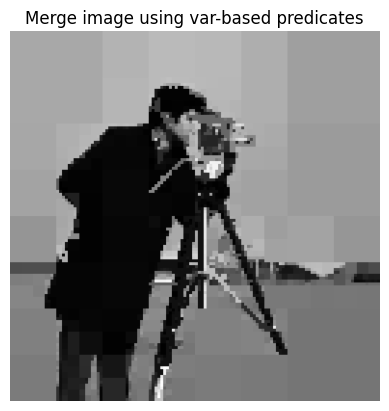

1637


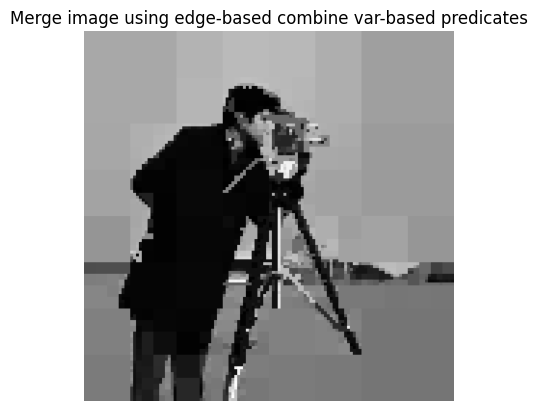

In [32]:
I = cam

plt.imshow(I)
plt.title("Original image")
plt.axis("off")
plt.show()
thres_split = 0.4* np.std(I)
thres_merge_edge=0.01
thres_merge_var = 0.4

plt.title("Merge image using edge-based predicates")
split_and_merge(I,thres_split,"edge",thres_merge)

plt.title("Merge image using var-based predicates")
split_and_merge(I,thres_split,"var",thres_merge)

plt.title("Merge image using edge-based combine var-based predicates")
split_and_merge(I,thres_split,"both", thres_merge_edge, thres_merge_var)

We noticed that the edge-based predicate for the merge did not produce good results. However, this is highly dependent on the image and the context under which we are working. Combining methods and multiple criteria could come in handy in some cases and not in others, experiments must always be done for each context to deduce the best technique in each situation.